# Índice de contenidos
1. Antes de empezar:

2. Reto 1 - Importar y describir el conjunto de datos

    2.0.0.1 Explore el conjunto de datos con técnicas matemáticas y de visualización. ¿Qué encuentra?

3. Reto 2 - Limpieza y transformación de datos

4. Reto 3 - Preprocesamiento de datos

    4.0.0.1 Utilizaremos el StandardScaler de sklearn.preprocessing y escalaremos nuestros datos. Lea más sobre StandardScaler aquí.

5. Reto 4 - Agrupación de datos con K-Means

6. Reto 5 - Agrupación de datos con DBSCAN

7. Reto 6 - Comparar K-Means con DBSCAN

8. Reto adicional 2 - Cambiar el número de clusters de K-Means

9. Bonus Challenge 3 - Cambiar DBSCAN eps y min_samples

# Antes de empezar:
- Lee el archivo README.md
- Comenta todo lo que puedas y utiliza los recursos del archivo README.md
- ¡Feliz aprendizaje!

In [1]:
# Import your libraries:

%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings                                              
from sklearn.exceptions import DataConversionWarning          
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

# Desafío 1 - Importar y describir el conjunto de datos

En este laboratorio, utilizaremos un conjunto de datos que contiene información sobre las preferencias de los clientes. Analizaremos cuánto gasta cada cliente en un año en cada subcategoría de la tienda de comestibles e intentaremos encontrar similitudes mediante la agrupación.

El origen del conjunto de datos es [aquí](https://archive.ics.uci.edu/ml/datasets/wholesale+customers).

In [8]:
data = pd.read_csv("/Users/mmeegg/Ironhack/lab-unsupervised-learning-es/data/Wholesale customers data.csv")
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


#### Explora el conjunto de datos con técnicas matemáticas y de visualización. ¿Qué encuentras?

Lista de comprobación:

* ¿Qué significa cada columna?
* ¿Hay datos categóricos que convertir?
* ¿Hay que eliminar datos que faltan?
* Colinealidad de columnas: ¿hay correlaciones altas?
* Estadísticas descriptivas: ¿hay que eliminar algún valor atípico?
* Distribución de los datos por columnas: ¿está sesgada la distribución?
* Etc.

Información adicional: Hace más de un siglo, un economista italiano llamado Vilfredo Pareto descubrió que aproximadamente el 20% de los clientes representan el 80% de las ventas minoristas típicas. Esto se denomina [principio de Pareto](https://en.wikipedia.org/wiki/Pareto_principle). Compruebe si este conjunto de datos presenta esta característica.

In [7]:
data.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [11]:
distinct_values = data.nunique()

print(distinct_values)

Channel               2
Region                3
Fresh               433
Milk                421
Grocery             430
Frozen              426
Detergents_Paper    417
Delicassen          403
dtype: int64


**Tus observaciones aquí**

+ Channel: Canal de cliente (1, 2).
Region: Región geográfica (1, 2, 3).
Fresh: Gasto anual en productos frescos.

Media: 12000.30
Desviación estándar: 12647.33
Mínimo: 3
Máximo: 112151

Milk: Gasto anual en productos lácteos.

Media: 5796.27
Desviación estándar: 7380.38
Mínimo: 55
Máximo: 73498

Grocery: Gasto anual en productos de abarrotes.

Media: 7951.28
Desviación estándar: 9503.16
Mínimo: 3
Máximo: 92780

Frozen: Gasto anual en productos congelados.

Media: 3071.93
Desviación estándar: 4854.67
Mínimo: 25
Máximo: 60869

Detergents_Paper: Gasto anual en productos de detergentes y papel.

Media: 2881.49
Desviación estándar: 4767.85
Mínimo: 3
Máximo: 40827

Delicassen: Gasto anual en productos de charcutería.

Media: 1524.87
Desviación estándar: 2820.11
Mínimo: 3
Máximo: 47943

+ Las columnas Channel y Region son categóricas, pero ya están en formato numérico, por lo que no es necesario convertirlas para el análisis exploratorio.

+ No hay datos faltantes en el conjunto de datos. 

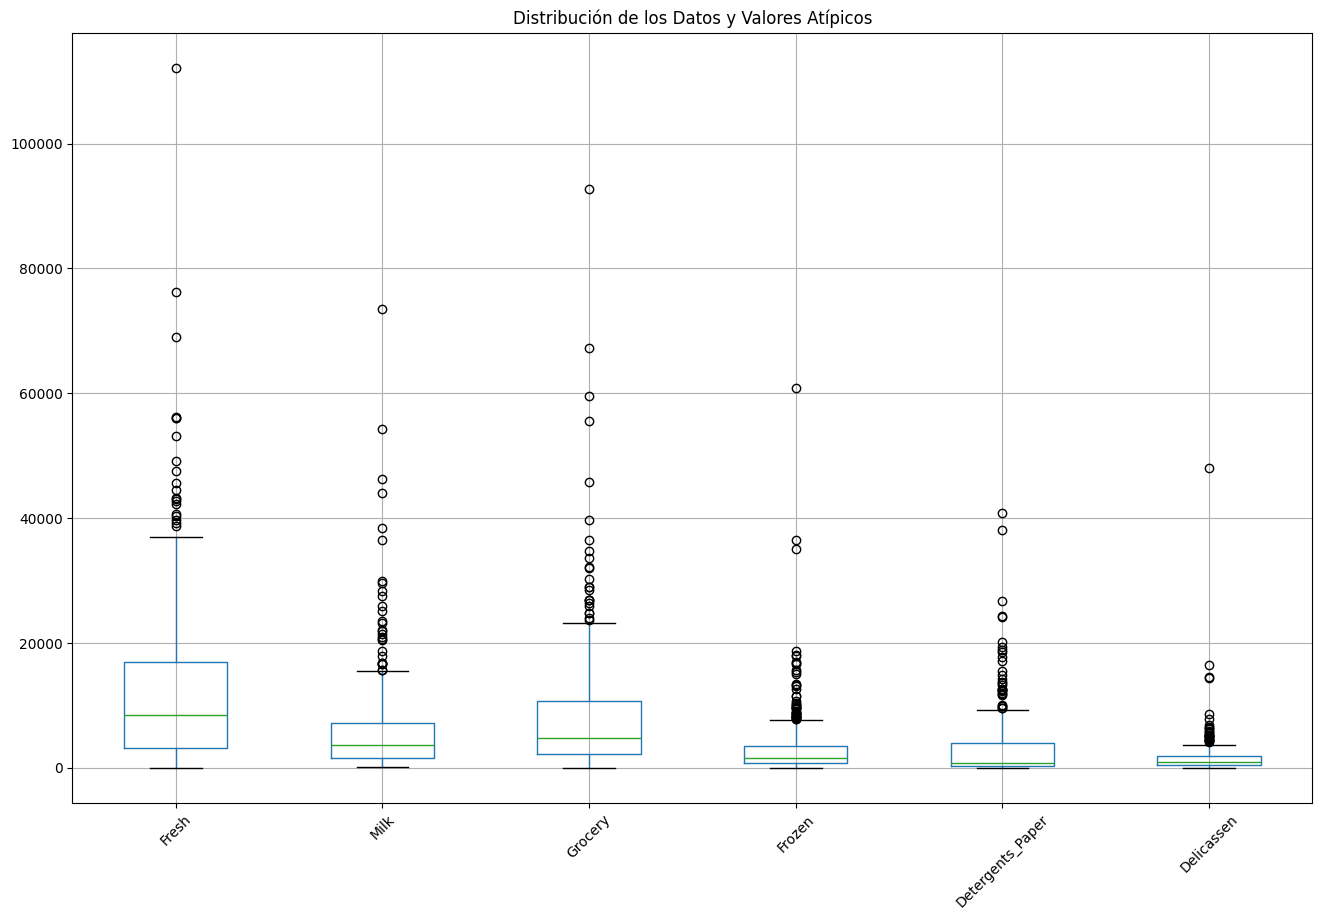

In [12]:
# List of columns to plot
columns_to_plot = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']

# Create box plots for each column
plt.figure(figsize=(16, 10))
data.boxplot(column=columns_to_plot)
plt.title('Distribución de los Datos y Valores Atípicos')
plt.xticks(rotation=45)
plt.show()

**Obeservacion**

El diagrama de caja muestra que todas las categorías tienen valores atípicos extremos, especialmente en las categorías de Fresh, Milk, Grocery, y Delicassen. Esto indica una distribución sesgada, con muchos valores muy altos en comparación con la mayoría de los datos.

# Reto 2 - Limpieza y transformación de datos

Si tu conclusión del reto anterior es que los datos necesitan limpieza/transformación, hazlo en las celdas de abajo. Sin embargo, si su conclusión es que los datos no necesitan ser limpiados o transformados, no dudes en saltarte este reto. Si optas por esta última opción, explica los motivos.

In [19]:
from sklearn.preprocessing import StandardScaler

# Lista de columnas a escalar
columns_to_scale = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']

# Capping (recorte) de valores atípicos a percentiles 1% y 99%
for column in columns_to_scale:
    lower_percentile = data[column].quantile(0.01)
    upper_percentile = data[column].quantile(0.99)
    data[column] = data[column].clip(lower=lower_percentile, upper=upper_percentile)

# Visualizar los datos transformados
data

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,0.075467,0.636499,-0.015411,-0.758475,-0.022442,-0.031487
1,2,3,-0.410730,0.660858,0.236950,-0.319864,0.128566,0.270217
2,2,3,-0.471722,0.502367,0.000055,-0.137677,0.182968,4.449983
3,1,3,0.127102,-0.701666,-0.435383,0.995400,-0.551092,0.278482
4,2,3,0.937143,-0.035114,-0.061054,0.290167,-0.241269,2.618408
...,...,...,...,...,...,...,...,...
435,1,3,1.551214,1.015330,1.049106,2.902562,-0.630378,0.565032
436,1,3,2.376416,-0.664495,-0.870067,0.458754,-0.652090,0.662845
437,2,3,0.236782,1.558979,2.836628,-0.695290,2.945758,0.332899
438,1,3,-0.130638,-0.577498,-0.685480,-0.525002,-0.633793,0.510615


**Tus observaciones aquí**

+ Parece que hay altas correlaciones entre algunas columnas 'Detergents_Paper', 'Grocery' y 'Milk'
+ Recorte de Valores Atípicospara limitarse los valores de cada columna a los percentiles 1% y 99%. 
+ Esta técnica ayuda a reducir el impacto de los valores atípicos extremos sin eliminarlos completamente, lo que puede ser beneficioso para algunos modelos.


# Reto 3 - Preprocesamiento de datos

Uno de los problemas del conjunto de datos es que los rangos de valores son notablemente diferentes en las distintas categorías (por ejemplo, `Fresh` y `Grocery` en comparación con `Detergents_Paper` y `Delicassen`). Si hiciste esta observación en el primer reto, ¡has hecho un gran trabajo! Esto significa que no sólo has completado las preguntas de bonificación en el anterior laboratorio de Aprendizaje Supervisado, sino que también has investigado en profundidad sobre [*feature scaling*](https://en.wikipedia.org/wiki/Feature_scaling). ¡Sigue trabajando así de bien!

Diversos rangos de valores en diferentes características podrían causar problemas en nuestra agrupación. La forma de reducir el problema es mediante el escalado de características. Volveremos a utilizar esta técnica con este conjunto de datos.

#### Utilizaremos el `StandardScaler` de `sklearn.preprocessing` y escalaremos nuestros datos. Lee más sobre `StandardScaler` [aquí](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler).

*Después de escalar tus datos, asigna los datos transformados a una nueva variable `customers_scale`.

In [25]:
# Your import here:

from sklearn.preprocessing import StandardScaler

# Escalado de datos
scaler = StandardScaler()
customers_scale = scaler.fit_transform(data[columns_to_scale])

# Convertir el resultado a un DataFrame
customers_scale = pd.DataFrame(customers_scale, columns=columns_to_scale)

customers_scale

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.075467,0.637279,-0.014970,-0.758539,-0.021886,-0.031231
1,-0.410732,0.661660,0.237884,-0.319875,0.129525,0.270879
2,-0.471723,0.503021,0.000527,-0.137666,0.184072,4.456276
3,0.127101,-0.702128,-0.435762,0.995547,-0.551949,0.279156
4,0.937143,-0.034958,-0.060702,0.290229,-0.241298,2.622234
...,...,...,...,...,...,...
435,1.551215,1.016461,1.051627,2.902938,-0.631446,0.566092
436,2.376418,-0.664923,-0.871296,0.458837,-0.653216,0.664036
437,0.236782,1.560615,2.842642,-0.695346,2.954241,0.333646
438,-0.130639,-0.577845,-0.686348,-0.525038,-0.634870,0.511601


# Reto 4 - Agrupación de datos con K-Means

Ahora vamos a agrupar los datos con K-Means primero. Inicia el modelo K-Means, luego ajusta tus datos escalados. En los datos devueltos por el método `.fit`, hay un atributo llamado `labels_` que es el número de cluster asignado a cada registro de datos. Lo que puede hacer es asignar estas etiquetas de nuevo a `customers` en una nueva columna llamada `customers['labels']`. Entonces verá los resultados de cluster de los datos originales.

In [26]:
from sklearn.cluster import KMeans

# Aplicar K-Means
kmeans = KMeans(n_clusters=3, random_state=42)  # Puedes ajustar el número de clusters (n_clusters) según sea necesario
kmeans.fit(customers_scale)

# Asignar las etiquetas de clúster a los datos originales
data['labels'] = kmeans.labels_

data.head()


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,labels
0,2,3,0.075467,0.637279,-0.014970,-0.758539,-0.021886,-0.031231,0
1,2,3,-0.410732,0.661660,0.237884,-0.319875,0.129525,0.270879,0
2,2,3,-0.471723,0.503021,0.000527,-0.137666,0.184072,4.456276,1
3,1,3,0.127101,-0.702128,-0.435762,0.995547,-0.551949,0.279156,0
4,2,3,0.937143,-0.034958,-0.060702,0.290229,-0.241298,2.622234,1


### Viendo el elbow pododríamos escoger 2 como el número de clusters correctos

In [27]:
kmeans_2 = KMeans(n_clusters=2).fit(customers_scale)

labels = kmeans_2.predict(customers_scale)

clusters = kmeans_2.labels_.tolist()

In [30]:
data['Label'] = clusters

Cuenta los valores en `labels`.

In [31]:
# Contar los valores en la columna 'Label' donde la etiqueta es 2
count_label_2 = data['Label'].value_counts().get(2, 0)

print(f'Número de registros en el cluster 2: {count_label_2}')

Número de registros en el cluster 2: 0


# Reto 5 - Clustering de datos con DBSCAN

Ahora vamos a agrupar los datos utilizando DBSCAN. Utiliza `DBSCAN(eps=0.5)` para iniciar el modelo y, a continuación, ajusta los datos escalados. En los datos devueltos por el método `.fit`, asigna las `labels_` de nuevo a `customers['labels_DBSCAN']`. Ahora tus datos originales tienen dos etiquetas, una de K-Means y la otra de DBSCAN.

In [32]:
from sklearn.cluster import DBSCAN 

# Iniciar el modelo DBSCAN
dbscan = DBSCAN(eps=0.5)

# Ajustar el modelo a los datos escalados
dbscan.fit(customers_scale)

# Extraer las etiquetas y asignarlas a la columna 'labels_DBSCAN'
data['labels_DBSCAN'] = dbscan.labels_

# Mostrar el DataFrame con las nuevas etiquetas
print(data.head())


   Channel  Region     Fresh      Milk   Grocery    Frozen  Detergents_Paper  \
0        2       3  0.075467  0.637279 -0.014970 -0.758539         -0.021886   
1        2       3 -0.410732  0.661660  0.237884 -0.319875          0.129525   
2        2       3 -0.471723  0.503021  0.000527 -0.137666          0.184072   
3        1       3  0.127101 -0.702128 -0.435762  0.995547         -0.551949   
4        2       3  0.937143 -0.034958 -0.060702  0.290229         -0.241298   

   Delicassen  labels  Label  labels_DBSCAN  
0   -0.031231       0      0             -1  
1    0.270879       0      0              1  
2    4.456276       1      1             -1  
3    0.279156       0      0             -1  
4    2.622234       1      0             -1  


Cuenta los valores en `labels_DBSCAN`.

In [34]:
# Contar los valores en la columna 'labels_DBSCAN'
label_counts = data['labels_DBSCAN'].value_counts()

# Mostrar el conteo de etiquetas
print(label_counts)

labels_DBSCAN
-1    268
 0    159
 1      8
 2      5
Name: count, dtype: int64


# Reto 6 - Comparar K-Means con DBSCAN

Ahora queremos comparar visualmente cómo K-Means y DBSCAN han agrupado nuestros datos. Crearemos gráficos de dispersión para varias columnas. Para cada uno de los siguientes pares de columnas, traza un gráfico de dispersión utilizando `labels` y otro utilizando `labels_DBSCAN`. Ponlos uno al lado del otro para compararlos. ¿Qué algoritmo de agrupación tiene más sentido?

Columnas a visualizar:

* `Detergents_Paper` as X and `Milk` as y
* `Grocery` as X and `Fresh` as y
* `Frozen` as X and `Delicassen` as y

Visualice `Detergentes_Papel` como X y `Leche` como Y mediante `labels` y `labels_DBSCAN` respectivamente

In [38]:
def plot(x,y,hue):
    sns.scatterplot(x=x, 
                    y=y,
                    hue=hue)
    plt.title('Detergents Paper vs Milk')
    return plt.show();

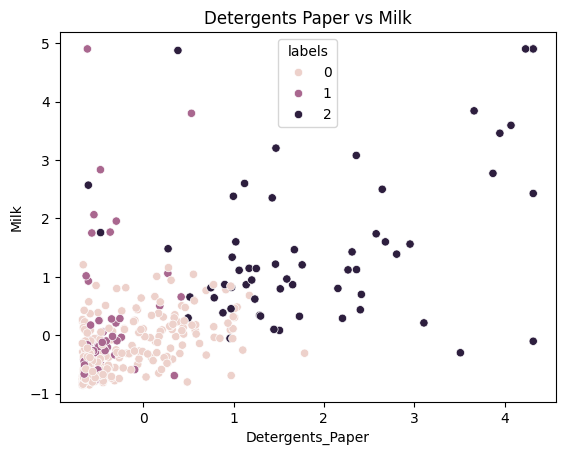

TypeError: plot() got an unexpected keyword argument 'title'

In [39]:
# Uso de la función con datos de ejemplo:
plot(data['Detergents_Paper'], data['Milk'], data['labels'])
plot(data['Detergents_Paper'], data['Milk'], data['labels_DBSCAN'], title='Detergents_Paper vs Milk with DBSCAN')

Visualice `Grocery` como X y `Fresh` como Y mediante `labels` y `labels_DBSCAN` respectivamente

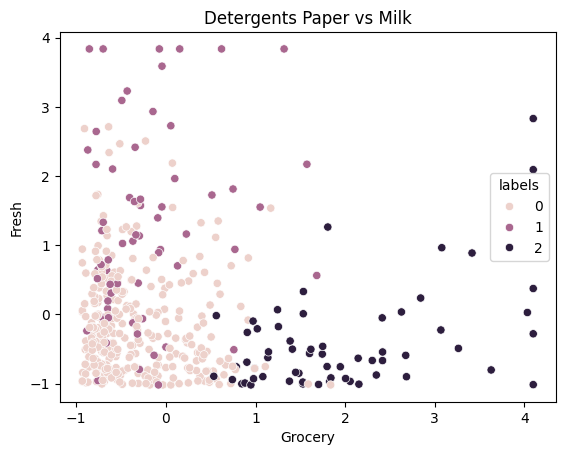

TypeError: plot() got an unexpected keyword argument 'title'

In [40]:
# Uso de la función con datos de ejemplo:
plot(data['Grocery'], data['Fresh'], data['labels'])
plot(data['Grocery'], data['Fresh'], data['labels_DBSCAN'], title='Grocery vs Fresh with DBSCAN')

Visualice `Frozen` como X y `Delicassen` como Y mediante `labels` y `labels_DBSCAN` respectivamente

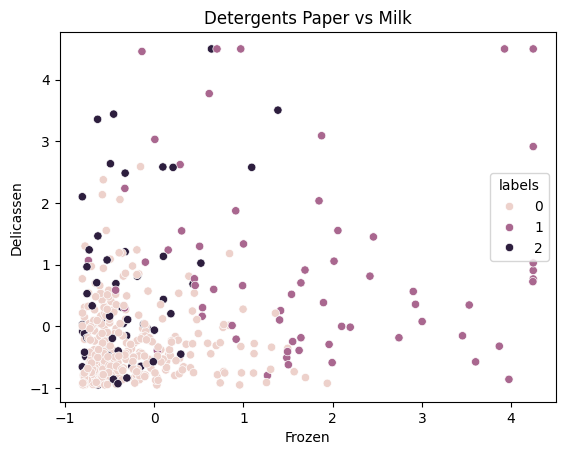

TypeError: plot() got an unexpected keyword argument 'title'

In [41]:
# Uso de la función con datos de ejemplo:
plot(data['Frozen'], data['Delicassen'], data['labels'])
plot(data['Frozen'], data['Delicassen'], data['labels_DBSCAN'], title='Detergents_Paper vs Delicassen with DBSCAN')


Vamos a utilizar un groupby para ver cómo la media difiere entre los grupos. Agrupamos `customers` por `labels` y `labels_DBSCAN` respectivamente y calculamos las medias de todas las columnas.

In [42]:
# Agrupar por etiquetas de K-Means y calcular la media de cada columna
mean_by_kmeans = data.groupby('labels').mean()

# Agrupar por etiquetas de DBSCAN y calcular la media de cada columna
mean_by_dbscan = data.groupby('labels_DBSCAN').mean()

# Mostrar las medias calculadas para cada agrupación
print("Medias por grupos de K-Means:")
print(mean_by_kmeans)

print("\nMedias por grupos de DBSCAN:")
print(mean_by_dbscan)



Medias por grupos de K-Means:
         Channel    Region     Fresh      Milk   Grocery    Frozen  \
labels                                                               
0       1.238095  2.555556 -0.180385 -0.322610 -0.337761 -0.282592   
1       1.125000  2.593750  1.268910  0.091092 -0.210744  1.708837   
2       1.967213  2.426230 -0.399820  1.570367  1.965282 -0.333590   

        Detergents_Paper  Delicassen     Label  labels_DBSCAN  
labels                                                         
0              -0.285316   -0.290337  0.000000      -0.400000  
1              -0.439743    0.959879  0.109375      -0.984375  
2               1.934720    0.492193  1.000000      -1.000000  

Medias por grupos de DBSCAN:
                Channel    Region     Fresh      Milk   Grocery    Frozen  \
labels_DBSCAN                                                               
-1             1.481343  2.578358  0.176027  0.354365  0.387430  0.170535   
 0             1.018868  2.490566 -0.2

¿Qué algoritmo funciona mejor?

**Tus observaciones aquí**

+ K-Means:
Los grupos pueden ser más esféricos y con características más uniformes dentro del grupo. Esto es útil si esperas clusters bien definidos y sin mucho ruido.

+ DBSCAN:
Puede formar clusters con formas arbitrarias y manejar mejor el ruido. Esto es útil si tienes datos con outliers o clusters de formas no convencionales.

# Bonus Challenge 2 - Cambiar el número de clusters de K-Means

Como hemos mencionado antes, no tenemos que preocuparnos por el número de clusters con DBSCAN porque lo decide automáticamente en función de los parámetros que le enviemos. Pero con K-Means, tenemos que suministrar el parámetro `n_clusters` (si no se suministra `n_clusters`, el algoritmo utilizará `8` por defecto). Debe saber que el número óptimo de clusters varía en función del conjunto de datos. K-Means puede funcionar mal si se utiliza un número incorrecto de clusters.

En el aprendizaje automático avanzado, los científicos de datos prueban diferentes números de clusters y evalúan los resultados con medidas estadísticas (leer [aquí](https://en.wikipedia.org/wiki/Cluster_analysis#External_evaluation)). Hoy no vamos a utilizar medidas estadísticas, sino nuestros ojos. En las celdas de abajo, experimenta con distintos números de conglomerados y visualízalos con gráficos de dispersión. ¿Qué número de clusters parece funcionar mejor para K-Means?

In [ ]:
# Your code here


**Tus observaciones aquí**

* Viendo los gráficos del k-means ...

# Bonus Challenge 3 - Cambiar `eps` y `min_samples` de DBSCAN

Experimenta cambiando los parámetros `eps` y `min_samples` de DBSCAN. Mira cómo difieren los resultados con la visualización de gráficos de dispersión.

In [ ]:
# Your code here


**Tus observaciones aquí**

    + El DBscan ajustado...
    
